Linear regression requires the relation between the dependent variable and the independent variable to be linear. What if the distribution of the data was more complex as shown in the below figure? Can linear models be used to fit non-linear data? How can we generate a curve that best captures the data as shown below? 

In [174]:
import numpy as np
np.random.seed(0)
list = np.random.rand(1,10)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

In [175]:
list

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
        0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152]])

In [176]:
x

array([ 1.56786929, -2.36282052, -0.28311318,  1.63497495,  0.6684103 ,
        0.99897702, -2.48223722,  2.61547479,  1.0607969 ,  4.56228722,
        9.65896945,  0.03914421, -0.5933086 ,  4.22649506, -4.80926387,
        6.36309702,  1.86272445,  2.56155155, -2.59833764, -2.40807631])

In [177]:
y

array([  -3.95663744,  -21.98989452,   -6.11812275,  -10.46843964,
         -4.11955719,   -3.02941914,  -21.76152272,   -1.51295226,
         -4.75491157,    6.50723268,  267.49204243,   -7.22394415,
         -9.52057614,    9.10179139, -111.21303611,   49.88859623,
         -8.6035594 ,   -2.82520047,  -32.71390268,  -24.62597457])

In [178]:
import matplotlib.pyplot as plt

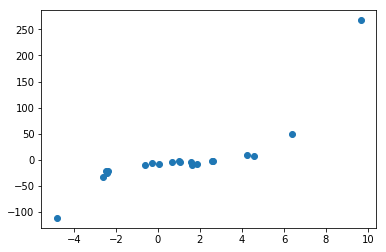

In [179]:
plt.scatter(x,y)

In [55]:
#Let’s apply a linear regression model to this dataset.

In [183]:

x = x[:,np.newaxis]
print(x.shape)

(20, 1)


In [184]:

y = y[:,np.newaxis]
print(y.shape)

(20, 1)


In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
linear_model_object = LinearRegression()

In [138]:
linear_model_object.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
y_pred = linear_model_object.predict(x)

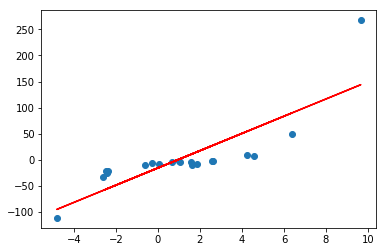

In [140]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='r')
plt.show()

# model accuracy RMSE and R2
We can see that the straight line is unable to capture the patterns in the data. This is an example of under-fitting. Computing the RMSE and R²-score of the linear line gives:

In [141]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [142]:
mse = mean_squared_error(y,y_pred)

In [143]:
mse

1469.765267320287

In [144]:
rmse = np.sqrt(mse)

In [145]:
rmse

38.337517751157115

In [146]:
r2 = r2_score(y,y_pred)

In [147]:
r2

0.671323166119186

In [97]:
#To overcome under-fitting, we need to increase the complexity of the model.

To generate a higher order equation we can add powers of the original features as new features.

This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.

To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn. Next, we train the model using Linear Regression.

In [185]:
from sklearn.preprocessing import PolynomialFeatures

import operator

In [186]:
poly = PolynomialFeatures(degree=2)

In [187]:
x_poly = poly.fit_transform(x)

In [188]:
linear_model_new = LinearRegression()

In [189]:
linear_model_new.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [190]:
y_poly_predict = linear_model_new.predict(x_poly)

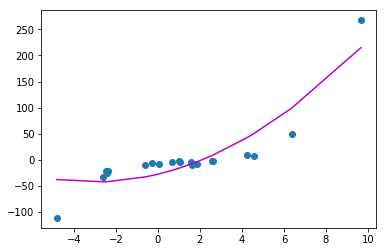

In [191]:
plt.scatter(x,y)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_predict), key=sort_axis)
x, y_poly_predict = zip(*sorted_zip)
plt.plot(x, y_poly_predict, color='m')
plt.show()

In [192]:
mse = mean_squared_error(y,y_poly_predict)

In [193]:
mse

9180.653361418594

In [194]:
rmse = np.sqrt(mse)

In [195]:
rmse

95.81572606528948

For degree=20, the model is also capturing the noise in the data. This is an example of over-fitting. Even though this model passes through most of the data, it will fail to generalize on unseen data.

To prevent over-fitting, we can add more training samples so that the algorithm doesn’t learn the noise in the system and can become more generalized. ( Note: adding more data can be an issue if the data is itself noise).


# How do we choose an optimal model? To answer this question we need to understand the bias vs variance trade-off.